# Music Genre classification

### Importing libraries

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools

# Set paths to input and output data
INPUT_DIR = 'Data/genres_original'

# Print available genres
parent_list = os.listdir(INPUT_DIR)
for i in range(2, len(parent_list)):
    print(parent_list[i])

metal
disco
blues
reggae
classical
rock
hiphop
country
jazz


### Importing Data

In [51]:
# features for songs which were split into 3sec audiofiles
df_features_3 = pd.read_csv("Data/features_3_sec.csv")

# features for songs which were not split
df_features_30 = pd.read_csv("Data/features_30_sec.csv")

In [21]:
df_features_3.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [22]:
df_features_30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Descriptive analysis

#### features_3_sec dataframe

In [23]:
df_features_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

There are no missing values

#### Numerical Features

In [32]:
# numerical features
df_features_3_description = df_features_3.describe()

# adding extra statistical parameters
df_features_3_description.loc['var'] = df_features_3.var(numeric_only=True).tolist()
df_features_3_description.loc['skew'] = df_features_3.skew(numeric_only=True).tolist()
df_features_3_description.loc['kurt'] = df_features_3.kurt(numeric_only=True).tolist()

df_features_3_description

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9.990000e+03,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4.566077e+03,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1.642065e+03,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,6.583363e+02,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3.378311e+03,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4.631378e+03,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5.591635e+03,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9.487446e+03,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206
var,0.0,0.008184,0.000093,0.004698,1.285673e-05,565294.377969,1.891941e+11,295777.661269,1.027192e+10,2.696379e+06,...,32.891939,1186.307593,32.232630,1325.008735,26.846008,1457.492497,26.130492,1729.368512,27.596565,2157.064808
skew,0.0,-0.017924,-0.773680,0.499129,3.071340e+00,0.271084,2.224999e+00,0.057923,2.263749e+00,1.010131e-01,...,-0.001748,4.274885,0.450941,3.134224,0.264218,3.255077,0.389578,4.802354,0.060784,4.009073


Length feature is the same for all audio files. A lot of features have a big variance

#### Numerical features distributions:

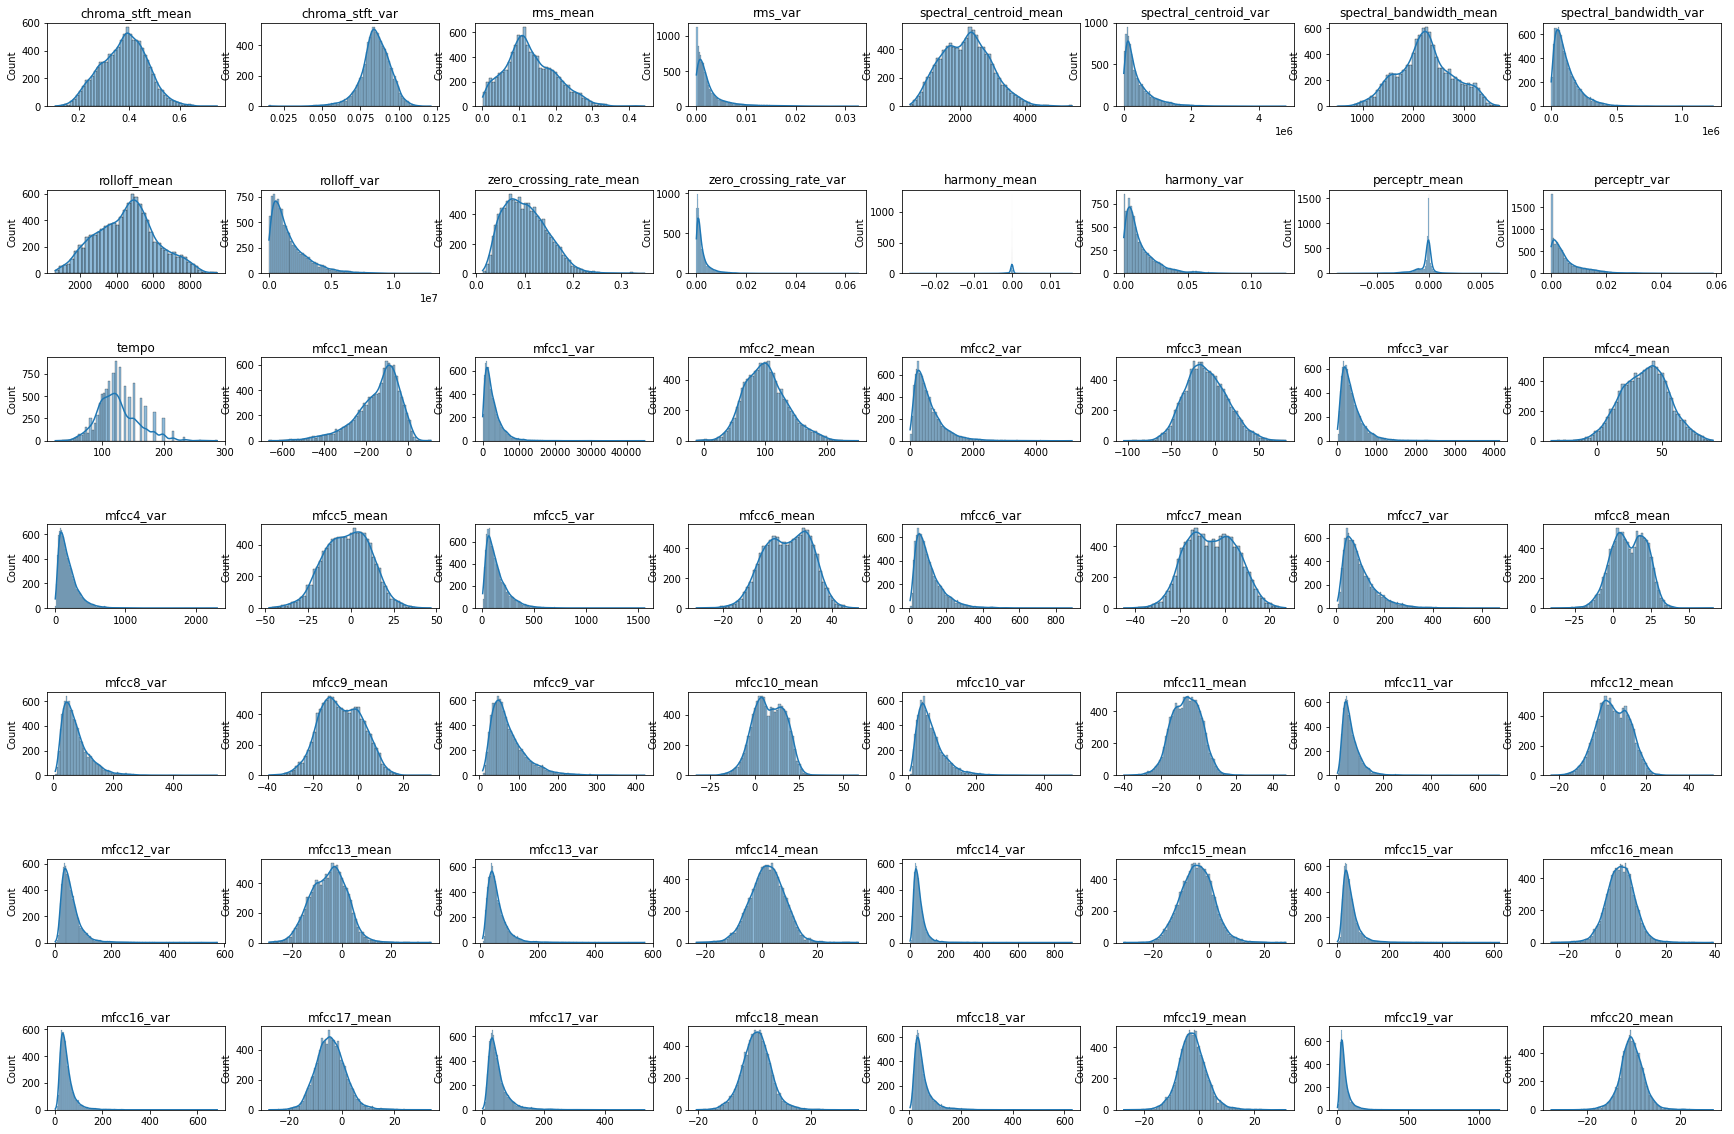

In [40]:
fig, ax = plt.subplots(7, 8, figsize=(30, 20))
ax = ax.flatten()

for i, var in enumerate(df_features_3.iloc[:, 2: -2]):
    sns.histplot(data=df_features_3, x=var, kde=True, ax=ax[i])
    ax[i].set_title(f"{var}")
    ax[i].set(xlabel=None)


plt.subplots_adjust(hspace=1)
plt.show()

Mean features are approximately normally distributed (comes from CLT) <br>
Variance features are all skewed right <br>
There are outliers in features

#### Categorical features

In [41]:
df_features_3.describe(include=["O"])

,filename,label
count,9990,9990
unique,9990,10
top,blues.00000.0.wav,blues
freq,1,1000


There are two categorical features: filename and label. Filename feature represents audio files names, label represents genre, an audio file associated with. The most popular genre in dataset is 'blues'

#### Categorical features distribution

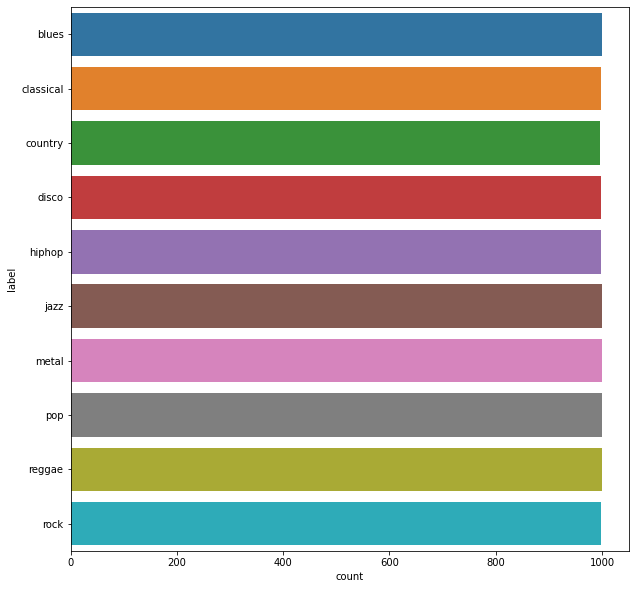

In [46]:
plt.figure(figsize=(10,10))

sns.countplot(y=df_features_3.label.sort_values())

plt.show()

Genres are almost equally distributed

#### features_30_sec

In [49]:
df_features_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

The amount of files is different. This follows from data description: df_features_30 contains info about 30 sec audio files, df_features_3 contains info about the songs which were split before into 3 seconds audio files.

In [47]:
# numerical features
df_features_30_description = df_features_30.describe()

# adding extra statistical parameters
df_features_30_description.loc['var'] = df_features_30.var(numeric_only=True).tolist()
df_features_30_description.loc['skew'] = df_features_30.skew(numeric_only=True).tolist()
df_features_30_description.loc['kurt'] = df_features_30.kurt(numeric_only=True).tolist()

df_features_30_description

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.620308e+05,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,1.370792e+05,4.571549e+03,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1.784074e+03,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,9.645567e+04,1.574792e+03,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,6.600000e+05,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,1.078719e+04,7.491406e+02,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,6.615040e+05,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,6.737655e+04,3.380070e+03,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,6.617940e+05,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,1.119775e+05,4.658524e+03,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,6.617940e+05,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,1.823716e+05,5.533810e+03,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,6.758080e+05,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,6.947848e+05,8.677673e+03,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155
var,3.182920e+06,0.006676,0.000060,0.004314,0.000013,512599.580412,1.607204e+11,277009.029952,9.303696e+09,2.479969e+06,...,20.966761,1141.220203,20.699744,1120.854965,14.969975,1183.496042,14.107210,1381.953214,14.722621,2045.618259
skew,6.077618e+00,-0.037826,-0.855287,0.442650,2.748841,0.234540,1.834951e+00,0.103004,1.734964e+00,1.169614e-01,...,-0.243572,3.849342,0.145908,2.752674,-0.012944,2.212806,0.013628,2.527609,-0.283008,3.363391


Here, unlike df_features_3_sec dataframe, length can be different for some audio files

#### Numerical features distributions

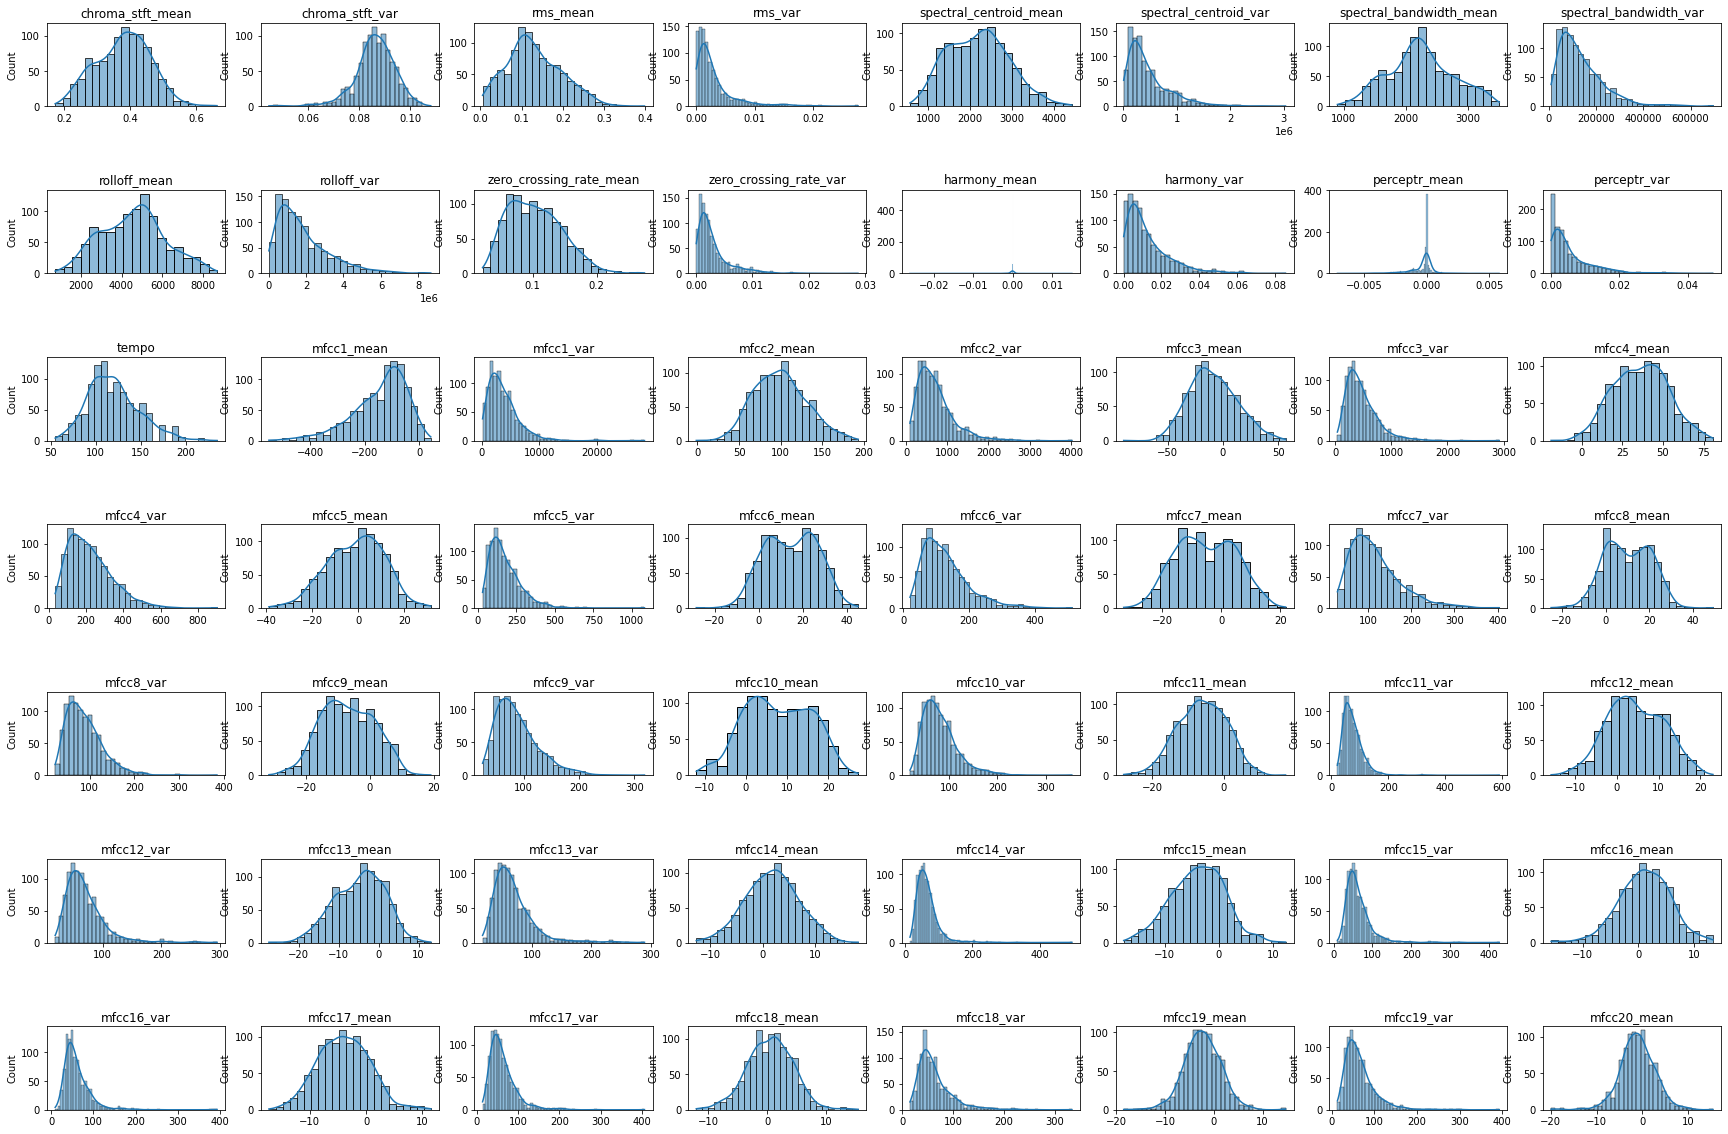

In [50]:
fig, ax = plt.subplots(7, 8, figsize=(30, 20))
ax = ax.flatten()

for i, var in enumerate(df_features_30.iloc[:, 2: -2]):
    sns.histplot(data=df_features_30, x=var, kde=True, ax=ax[i])
    ax[i].set_title(f"{var}")
    ax[i].set(xlabel=None)


plt.subplots_adjust(hspace=1)
plt.show()

The distributions are very similar to the ones from df_features_3_sec dataframe

#### Categorical features

In [52]:
df_features_30.describe(include=['O'])

,filename,label
count,1000,1000
unique,1000,10
top,blues.00000.wav,blues
freq,1,100


#### Categorical features distribution

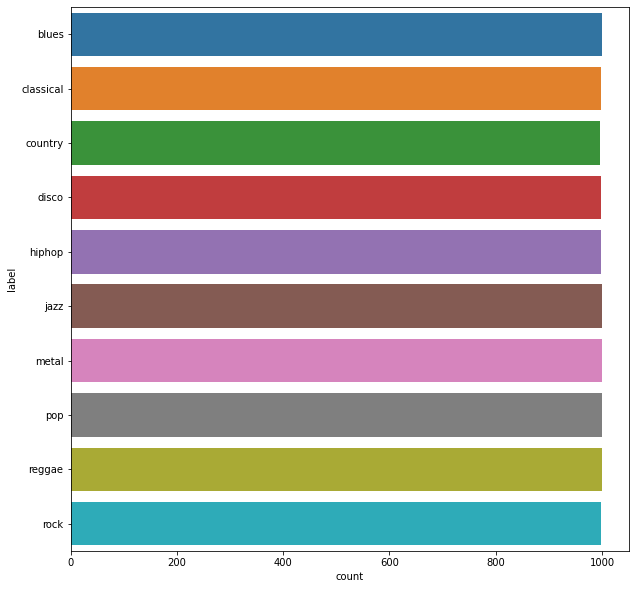

In [53]:
plt.figure(figsize=(10,10))

sns.countplot(y=df_features_3.label.sort_values())

plt.show()

Genres are equally distributed

### EDA